# Exercise 3: Visualisera och utvärdera modellprestanda
I denna övning ska du:
1. Jämföra prestanda mellan flera modeller.
2. Visualisera resultaten med `matplotlib`.

**Instruktioner:**
- Utvärdera och jämför modellerna från Grid Search och Random Search.

Noggrannhet: 0.45
Precision: 0.35
Recall: 0.45
F1-score: 0.39


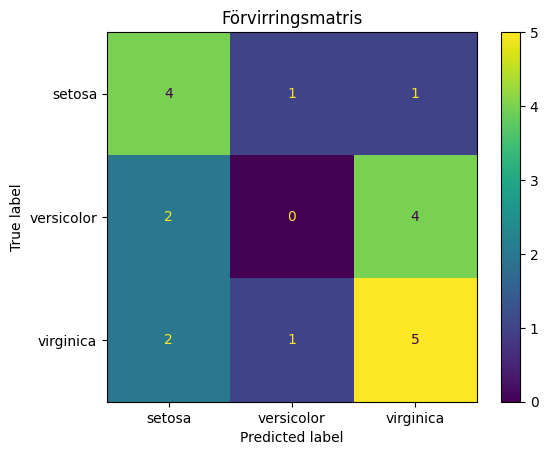

In [1]:
# Importera nödvändiga bibliotek
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ladda datasetet
iris = pd.read_csv("iris_transformed.csv")

# Definiera indata och målvariabel
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']  # Klassificeringsproblem

# Dela upp datasetet i tränings- och testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Träna en klassificeringsmodell (Decision Tree)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Gör prediktioner på testdatan
y_pred = model.predict(X_test)

# Utvärderingsmått
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Visa resultaten
print(f"Noggrannhet: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Visualisera förvirringsmatrisen
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="viridis")
plt.title("Förvirringsmatris")
plt.show()
